# Convolution

Convolution is a mathematical way of combining two signals to form a third signal. It is the single most important technique in Digital Signal Processing. Using the strategy of impulse decomposition, systems are described by a signal called the impulse response. Convolution is important because it relates the three signals of interest: the input signal, the output signal, and the impulse response. This chapter presents convolution from two different viewpoints, called the input side algorithm and the output side algorithm.

The mathematical form of the convolution is:

$$ y[i] = \sum_{j=0}^{M-1}{x[j]h[i-j]} $$

To develop the convolution we define the following:
    
* Input Signal $x[n]$ of size $N$ 
* Impulse Response $h[n]$ of size $M$
* Output Signal $y[n]$ of size $N + M -1$

There are two types of algorithms that can be performed:

1. Input Side Algorithm
2. Output Side Algorithm

## Output Side Algorithm
Analyzes how each sample in the input signal affects many samples in the output signal.

![Input Side Algorithm](Images/input_side_algorithm.gif)

The algorithm calculates the convolution in the following way:

$$y[i+j] = \sum_{i=0}^{N-1}  \sum_{j=0}^{M-1}{x[i]h[j]}$$ 

where $M$ is the lenght of the impulse response and $N$ the input signal size and $y[n]$ has a size of $M+N-1$.

The following picture describes the algorithm:

![Input Side Algorithm](Images/input_side.jpg)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,10)

In [7]:
InputSignal_f32_1kHz_15kHz = np.loadtxt(fname = "InputSignal_f32_1kHz_15kHz.dat").flatten()
Impulse_response = np.loadtxt(fname = "Impulse_response.dat").flatten()

In [9]:
M = len(Impulse_response)
N = len(InputSignal_f32_1kHz_15kHz)

output = np.zeros(M+N-1)

for i in range(M): 
    for j in range(N):
        output[i+j] = output[i+j] + Impulse_response[i] * InputSignal_f32_1kHz_15kHz[j]

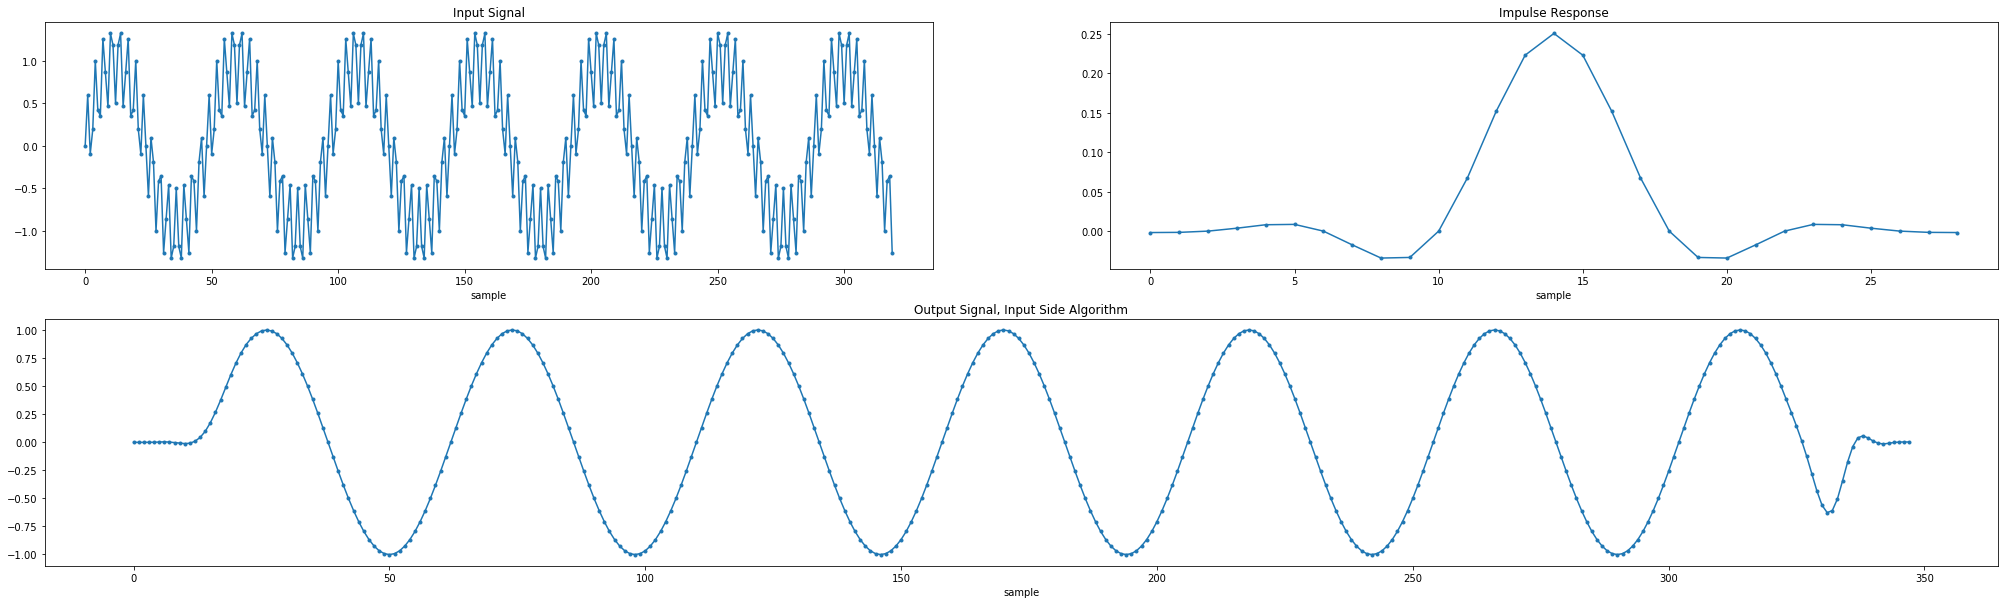

In [10]:
plt.subplot(2, 2, 1)
plt.plot(InputSignal_f32_1kHz_15kHz, '.-')
plt.title('Input Signal')
plt.xlabel('sample')

plt.subplot(2, 2, 2)
plt.plot(Impulse_response, '.-')
plt.title('Impulse Response')
plt.xlabel('sample')

plt.subplot(2, 1, 2)
plt.plot(output, '.-')
plt.title('Output Signal, Input Side Algorithm')
plt.xlabel('sample')

plt.show()

## input Side Algorithm
We look at individual samples in the output signal and find the contributing points from the input.

The algorithm calculates the convolution in the following way:

[//]: $$y[i] = \sum_{i=0}^{M+N-1}  \sum_{j=0}^{M-1}{h[j]x[i-j]}$$ 
$$y[i] = \sum_{j=0}^{M-1}{h[j]x[i-j]}$$ 

if $$i-j>0 $$ and $$i-j<N-1$$

where $M$ is the lenght of the impulse response and $N$ the input signal size and $y[n]$ has a size of $M+N-1$.

The following picture describes the algorithm:

![Input Side Algorithm](Images/output_side.jpg)

In [11]:
M = len(Impulse_response)
N = len(InputSignal_f32_1kHz_15kHz)

output2 = np.zeros(M+N-1)

for i in range(N+M-1): 
    output2[i] = 0
    for j in range(M):
        if((i-j)>0 and (i-j)<(N-1)):
            output2[i] = output2[i] + Impulse_response[j] * InputSignal_f32_1kHz_15kHz[i-j]

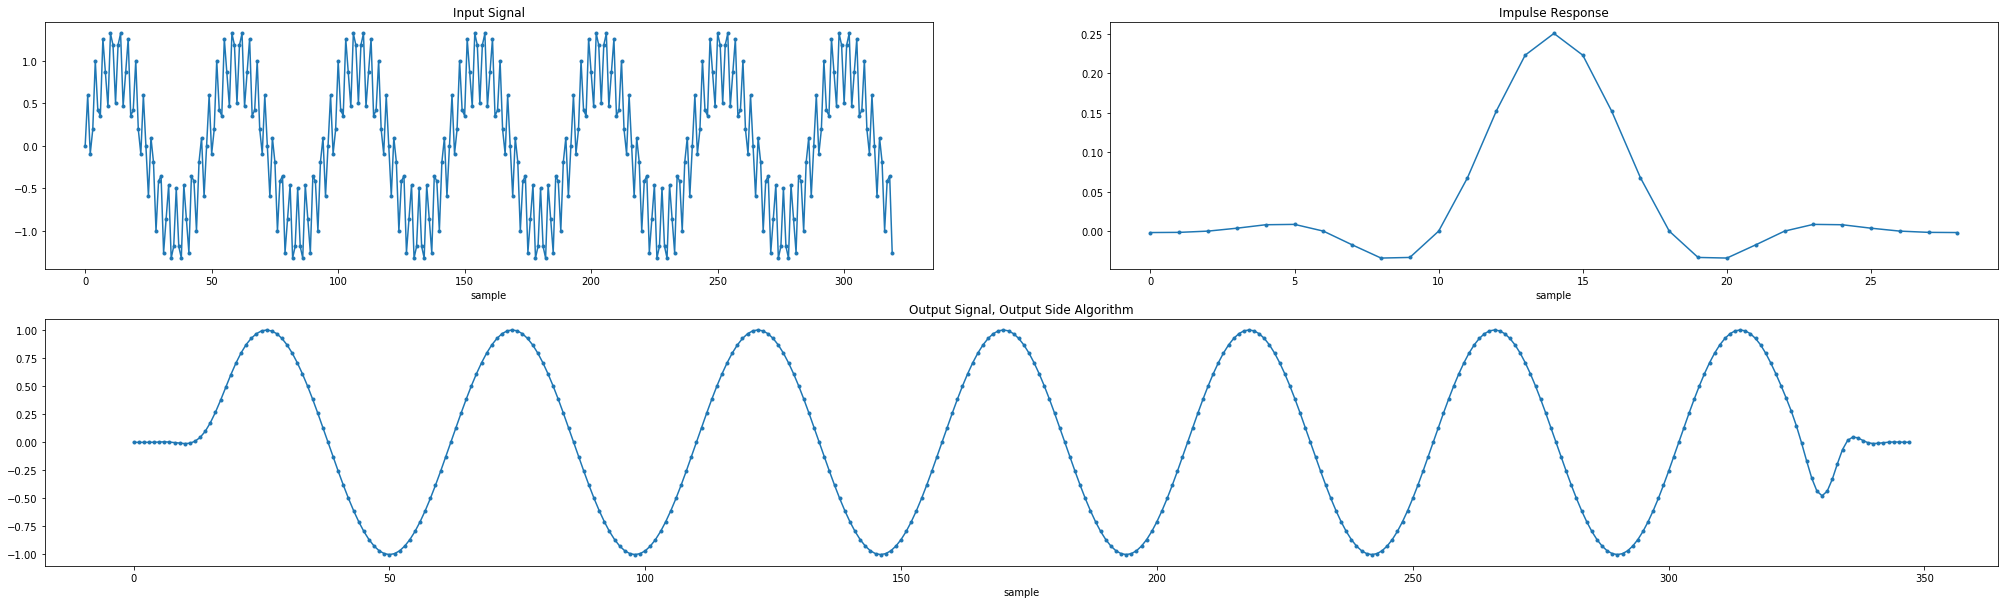

In [12]:
plt.subplot(2, 2, 1)
plt.plot(InputSignal_f32_1kHz_15kHz, '.-')
plt.title('Input Signal')
plt.xlabel('sample')

plt.subplot(2, 2, 2)
plt.plot(Impulse_response, '.-')
plt.title('Impulse Response')
plt.xlabel('sample')

plt.subplot(2, 1, 2)
plt.plot(output2, '.-')
plt.title('Output Signal, Output Side Algorithm')
plt.xlabel('sample')

plt.show()